In [1]:
import sklearn.externals.joblib as joblib
import sklearn.metrics
import sklearn.externals.joblib as joblib
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA

from MulticoreTSNE import MulticoreTSNE as TSNE

In [2]:
data = pd.read_csv('../data/dataset.csv', header=None)

In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
0,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.385031,0.60,0.40,0.565036,0.054403
1,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.695652,0.20,0.20,0.372974,0.030327
2,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.163088,1.00,1.00,0.979375,0.203325
3,pe-malicious,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.925532,0.25,0.25,0.648750,0.000407
4,pe-malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.220399,1.00,1.00,0.979375,0.203325


In [4]:
desc = data.describe()
desc

,1,2,3,4,5,6,7,8,9,10,...,477,478,479,480,481,482,483,484,485,486
count,199970.000000,199970.000000,199970.0,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,...,199970.000000,199970.000000,199970.00000,1.999700e+05,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000
mean,0.231620,0.266580,0.0,0.071796,0.951718,0.258664,0.324694,0.894734,0.634985,0.160839,...,0.001410,0.001167,0.00026,2.941618e-07,0.000203,0.587225,0.296704,0.306406,0.658720,0.057542
std,0.421868,0.442172,0.0,0.258150,0.214363,0.437902,0.468261,0.306896,0.481436,0.367383,...,0.030693,0.028083,0.00787,1.315433e-04,0.007702,0.382165,0.230487,0.220715,0.154955,0.132531
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.171875,0.166667,0.166667,0.552788,0.001192
50%,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.702378,0.250000,0.250000,0.668613,0.011694
75%,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.972997,0.333333,0.333333,0.756279,0.059431
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.948454,0.886762,0.80000,5.882353e-02,0.978261,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
desc.T[desc.T['min'] == desc.T['max']]

,count,mean,std,min,25%,50%,75%,max
3,199970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
sample = data.sample(frac=0.02)

y = sample.loc[:,0].values
X = sample.loc[:,1:].values
X = Normalizer().fit_transform(X)

In [7]:
tsne = TSNE(
    n_components=2,
    n_jobs=-1
).fit_transform(X)

In [8]:
plot_df = pd.concat(
    [pd.DataFrame(y, columns=['class']), pd.DataFrame(tsne, columns=['x','y'])],
    axis=1
)
plot_df.head()

,class,x,y
0,pe-legit,-12.225666,-17.410194
1,pe-legit,15.802031,2.541407
2,pe-legit,-20.632179,-6.082944
3,pe-legit,-2.268445,-17.041404
4,pe-malicious,4.845274,-3.347242


/usr/local/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


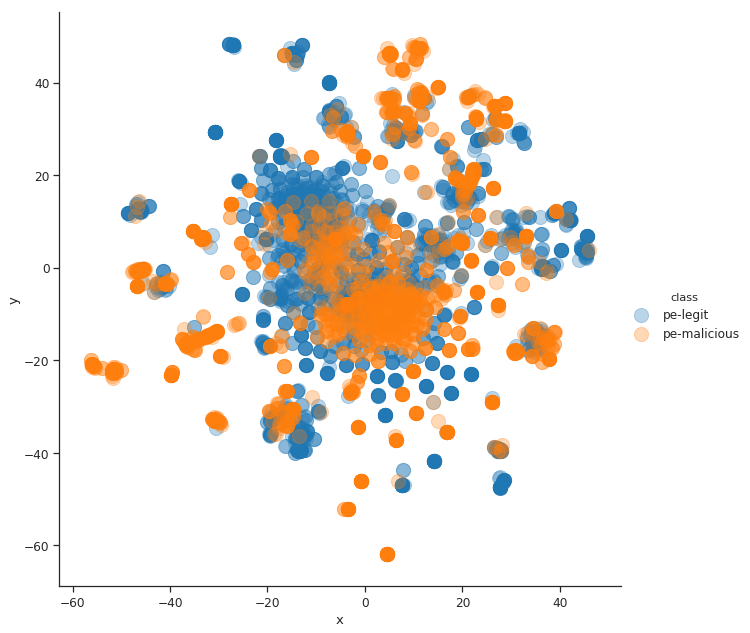

In [9]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='x',
           y='y',
           data=plot_df,
           fit_reg=False,
           legend=True,
           size=9,
           hue='class',
           scatter_kws={"s":200, "alpha":0.3})

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [11]:
model = LogisticRegression()#C=0.6,dual=True)

In [12]:
sample = data.sample(frac=1.0)
y = sample.loc[:,0].values
X = sample.loc[:,1:].values
X = Normalizer().fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = dupa = train_test_split(X,y, train_size=0.8, shuffle=False)


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
model.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
model.score(X_test, y_test)

0.8483022453368005

In [17]:
feature_names = """has_configuration
has_debug
has_exceptions
has_exports
has_imports
has_nx
has_relocations
has_resources
has_rich_header
has_signature
has_tls
entrypoint0
entrypoint1
entrypoint2
entrypoint3
entrypoint4
entrypoint5
entrypoint6
entrypoint7
entrypoint8
entrypoint9
entrypoint10
entrypoint11
entrypoint12
entrypoint13
entrypoint14
entrypoint15
entrypoint16
entrypoint17
entrypoint18
entrypoint19
entrypoint20
entrypoint21
entrypoint22
entrypoint23
entrypoint24
entrypoint25
entrypoint26
entrypoint27
entrypoint28
entrypoint29
entrypoint30
entrypoint31
entrypoint32
entrypoint33
entrypoint34
entrypoint35
entrypoint36
entrypoint37
entrypoint38
entrypoint39
entrypoint40
entrypoint41
entrypoint42
entrypoint43
entrypoint44
entrypoint45
entrypoint46
entrypoint47
entrypoint48
entrypoint49
entrypoint50
entrypoint51
entrypoint52
entrypoint53
entrypoint54
entrypoint55
entrypoint56
entrypoint57
entrypoint58
entrypoint59
entrypoint60
entrypoint61
entrypoint62
entrypoint63
byte(00)
byte(01)
byte(02)
byte(03)
byte(04)
byte(05)
byte(06)
byte(07)
byte(08)
byte(09)
byte(0a)
byte(0b)
byte(0c)
byte(0d)
byte(0e)
byte(0f)
byte(10)
byte(11)
byte(12)
byte(13)
byte(14)
byte(15)
byte(16)
byte(17)
byte(18)
byte(19)
byte(1a)
byte(1b)
byte(1c)
byte(1d)
byte(1e)
byte(1f)
byte(20)
byte(21)
byte(22)
byte(23)
byte(24)
byte(25)
byte(26)
byte(27)
byte(28)
byte(29)
byte(2a)
byte(2b)
byte(2c)
byte(2d)
byte(2e)
byte(2f)
byte(30)
byte(31)
byte(32)
byte(33)
byte(34)
byte(35)
byte(36)
byte(37)
byte(38)
byte(39)
byte(3a)
byte(3b)
byte(3c)
byte(3d)
byte(3e)
byte(3f)
byte(40)
byte(41)
byte(42)
byte(43)
byte(44)
byte(45)
byte(46)
byte(47)
byte(48)
byte(49)
byte(4a)
byte(4b)
byte(4c)
byte(4d)
byte(4e)
byte(4f)
byte(50)
byte(51)
byte(52)
byte(53)
byte(54)
byte(55)
byte(56)
byte(57)
byte(58)
byte(59)
byte(5a)
byte(5b)
byte(5c)
byte(5d)
byte(5e)
byte(5f)
byte(60)
byte(61)
byte(62)
byte(63)
byte(64)
byte(65)
byte(66)
byte(67)
byte(68)
byte(69)
byte(6a)
byte(6b)
byte(6c)
byte(6d)
byte(6e)
byte(6f)
byte(70)
byte(71)
byte(72)
byte(73)
byte(74)
byte(75)
byte(76)
byte(77)
byte(78)
byte(79)
byte(7a)
byte(7b)
byte(7c)
byte(7d)
byte(7e)
byte(7f)
byte(80)
byte(81)
byte(82)
byte(83)
byte(84)
byte(85)
byte(86)
byte(87)
byte(88)
byte(89)
byte(8a)
byte(8b)
byte(8c)
byte(8d)
byte(8e)
byte(8f)
byte(90)
byte(91)
byte(92)
byte(93)
byte(94)
byte(95)
byte(96)
byte(97)
byte(98)
byte(99)
byte(9a)
byte(9b)
byte(9c)
byte(9d)
byte(9e)
byte(9f)
byte(a0)
byte(a1)
byte(a2)
byte(a3)
byte(a4)
byte(a5)
byte(a6)
byte(a7)
byte(a8)
byte(a9)
byte(aa)
byte(ab)
byte(ac)
byte(ad)
byte(ae)
byte(af)
byte(b0)
byte(b1)
byte(b2)
byte(b3)
byte(b4)
byte(b5)
byte(b6)
byte(b7)
byte(b8)
byte(b9)
byte(ba)
byte(bb)
byte(bc)
byte(bd)
byte(be)
byte(bf)
byte(c0)
byte(c1)
byte(c2)
byte(c3)
byte(c4)
byte(c5)
byte(c6)
byte(c7)
byte(c8)
byte(c9)
byte(ca)
byte(cb)
byte(cc)
byte(cd)
byte(ce)
byte(cf)
byte(d0)
byte(d1)
byte(d2)
byte(d3)
byte(d4)
byte(d5)
byte(d6)
byte(d7)
byte(d8)
byte(d9)
byte(da)
byte(db)
byte(dc)
byte(dd)
byte(de)
byte(df)
byte(e0)
byte(e1)
byte(e2)
byte(e3)
byte(e4)
byte(e5)
byte(e6)
byte(e7)
byte(e8)
byte(e9)
byte(ea)
byte(eb)
byte(ec)
byte(ed)
byte(ee)
byte(ef)
byte(f0)
byte(f1)
byte(f2)
byte(f3)
byte(f4)
byte(f5)
byte(f6)
byte(f7)
byte(f8)
byte(f9)
byte(fa)
byte(fb)
byte(fc)
byte(fd)
byte(fe)
byte(ff)
import(libssp-0)
import(kernel32)
import(user32)
import(advapi32)
import(oleaut32)
import(shell32)
import(ole32)
import(gdi32)
import(comctl32)
import(version)
import(msvcrt)
import(comdlg32)
import(shlwapi)
import(wininet)
import(ws2_32)
import(winmm)
import(winspool.drv)
import(wsock32)
import(msvbvm60)
import(rpcrt4)
import(mpr)
import(psapi)
import(iphlpapi)
import(ntdll)
import(msimg32)
import(mscoree)
import(crypt32)
import(gdiplus)
import(userenv)
import(crtdll)
import(oledlg)
import(mfc42)
import(urlmon)
import(imm32)
import(rtl100.bpl)
import(netapi32)
import(wintrust)
import(vcl100.bpl)
import(vcl50.bpl)
import(uxtheme)
import(setupapi)
import(ntoskrnl.pe)
import(msi)
import(msvcp60)
import(lz32)
import(winhttp)
import(hal)
import(core.bpl)
import(rbrcl1416.bpl)
import(dbghelp)
import(api-ms-win-crt-runtime-l1-1-0)
import(api-ms-win-crt-heap-l1-1-0)
import(api-ms-win-crt-math-l1-1-0)
import(api-ms-win-crt-stdio-l1-1-0)
import(api-ms-win-crt-locale-l1-1-0)
import(oleacc)
import(komponentyd17.bpl)
import(job.bpl)
import(cam.bpl)
import(vcruntime140)
import(secur32)
import(msvcr100)
import(cxeditorsrs17.bpl)
import(rasapi32)
import(api-ms-win-crt-string-l1-1-0)
import(wtsapi32)
import(imagehlp)
import(msvcp140)
import(cnc.bpl)
import(indyprotocols190.bpl)
import(api-ms-win-crt-convert-l1-1-0)
import(msvcr120)
import(vcl60.bpl)
import(rbrcl210.bpl)
import(rtl170.bpl)
import(rbide1416.bpl)
import(rtl60.bpl)
import(vcl170.bpl)
import(wldap32)
import(shfolder)
import(cxlibraryrs17.bpl)
import(msvcirt)
import(report.bpl)
import(rtl190.bpl)
import(msvcr90)
import(api-ms-win-crt-filesystem-l1-1-0)
import(cxeditorsrs16.bpl)
import(avifil32)
import(api-ms-win-crt-time-l1-1-0)
import(jli)
import(graphic.bpl)
import(olepro32)
import(rtl160.bpl)
import(spmmachine.bpl)
import(cabinet)
import(indycore190.bpl)
import(sacom210.bpl)
import(rbrtl1416.bpl)
import(api-ms-win-crt-utility-l1-1-0)
import(vcl160.bpl)
import(api-ms-win-crt-environment-l1-1-0)
import(zcomponent170.bpl)
import(msvfw32)
import(libadm_coreutils6)
import(rbsha)
import(dxpscorers16.bpl)
import(msacm32)
import(vcl70.bpl)
import(applicationmanagement.bpl)
import(jobgui.bpl)
import(indyprotocols170.bpl)
import(rtl70.bpl)
import(cxed210.bpl)
import(msvcr80)
import(libadm_coretinypy6)
import(ucrtbased)
import(vcruntime140d)
import(msvcp120)
import(msvcp140d)
import(dinput8)
import(gui.bpl)
import(maincontrols.bpl)
import(rtl120.bpl)
import(jcl170.bpl)
import(frx17.bpl)
import(fs17.bpl)
import(vcl190.bpl)
import(sdl2)
import(machine.bpl)
import(mfc42u)
import(normaliz)
import(sdl2_gfx)
import(sdl2_ttf)
import(sdl2_mixer)
import(msvcp80)
import(cxgridrs17.bpl)
import(cxeditorsvcld7.bpl)
import(libeay32)
import(cxlibraryd11.bpl)
import(vcl120.bpl)
import(gr32_d6.bpl)
import(cxlibraryrs16.bpl)
import(cxgridrs16.bpl)
import(vcl40.bpl)
import(opengl32)
import(qt5core)
import(qtcore4)
import(wdfldr.sys)
import(nesting.bpl)
import(fltmgr.sys)
vsize_ratio
code_sections_ratio
pec_sections_ratio
sections_avg_entropy
sections_vsize_avg_ratio""".split('\n')

In [18]:
from xgboost import XGBClassifier, plot_importance

In [19]:
model = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"],
    feature_names=feature_names
)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-error:0.041981	validation_0-auc:0.981639
[1]	validation_0-error:0.03418	validation_0-auc:0.989498
[2]	validation_0-error:0.029054	validation_0-auc:0.991683
[3]	validation_0-error:0.027679	validation_0-auc:0.99265
[4]	validation_0-error:0.026504	validation_0-auc:0.993506
[5]	validation_0-error:0.025604	validation_0-auc:0.993947
[6]	validation_0-error:0.024654	validation_0-auc:0.994345
[7]	validation_0-error:0.024004	validation_0-auc:0.994926
[8]	validation_0-error:0.023954	validation_0-auc:0.995119
[9]	validation_0-error:0.022953	validation_0-auc:0.995521
[10]	validation_0-error:0.022453	validation_0-auc:0.995763
[11]	validation_0-error:0.021778	validation_0-auc:0.995996
[12]	validation_0-error:0.021303	validation_0-auc:0.996209
[13]	validation_0-error:0.020778	validation_0-auc:0.996319
[14]	validation_0-error:0.019978	validation_0-auc:0.996458
[15]	validation_0-error:0.019503	validation_0-auc:0.996521
[16]	validation_0-error:0.019303	validation_0-auc:0.99675
[17]	valid

[139]	validation_0-error:0.012652	validation_0-auc:0.998407
[140]	validation_0-error:0.012627	validation_0-auc:0.998409
[141]	validation_0-error:0.012577	validation_0-auc:0.99841
[142]	validation_0-error:0.012627	validation_0-auc:0.998408
[143]	validation_0-error:0.012677	validation_0-auc:0.998405
[144]	validation_0-error:0.012577	validation_0-auc:0.998403
[145]	validation_0-error:0.012552	validation_0-auc:0.998406
[146]	validation_0-error:0.012477	validation_0-auc:0.998407
[147]	validation_0-error:0.012502	validation_0-auc:0.998409
[148]	validation_0-error:0.012527	validation_0-auc:0.99841
[149]	validation_0-error:0.012452	validation_0-auc:0.998413


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eval_metric=['error', 'auc'],
       feature_names=['has_configuration', 'has_debug', 'has_exceptions', 'has_exports', 'has_imports', 'has_nx', 'has_relocations', 'has_resources', 'has_rich_header', 'has_signature', 'has_tls', 'entrypoint0', 'entrypoint1', 'entrypoint2', 'entrypoint3', 'entrypoint4', 'entrypoint5', 'entrypoint6', 'entr...o', 'code_sections_ratio', 'pec_sections_ratio', 'sections_avg_entropy', 'sections_vsize_avg_ratio'],
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=23,
       min_child_weight=1, missing=None, n_estimators=150, n_jobs=28,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [20]:
model.score(X_test, y_test)

0.987548132219833

In [21]:
model.score(X_test, y_test)

0.987548132219833

In [22]:
model.get_booster().feature_names=feature_names

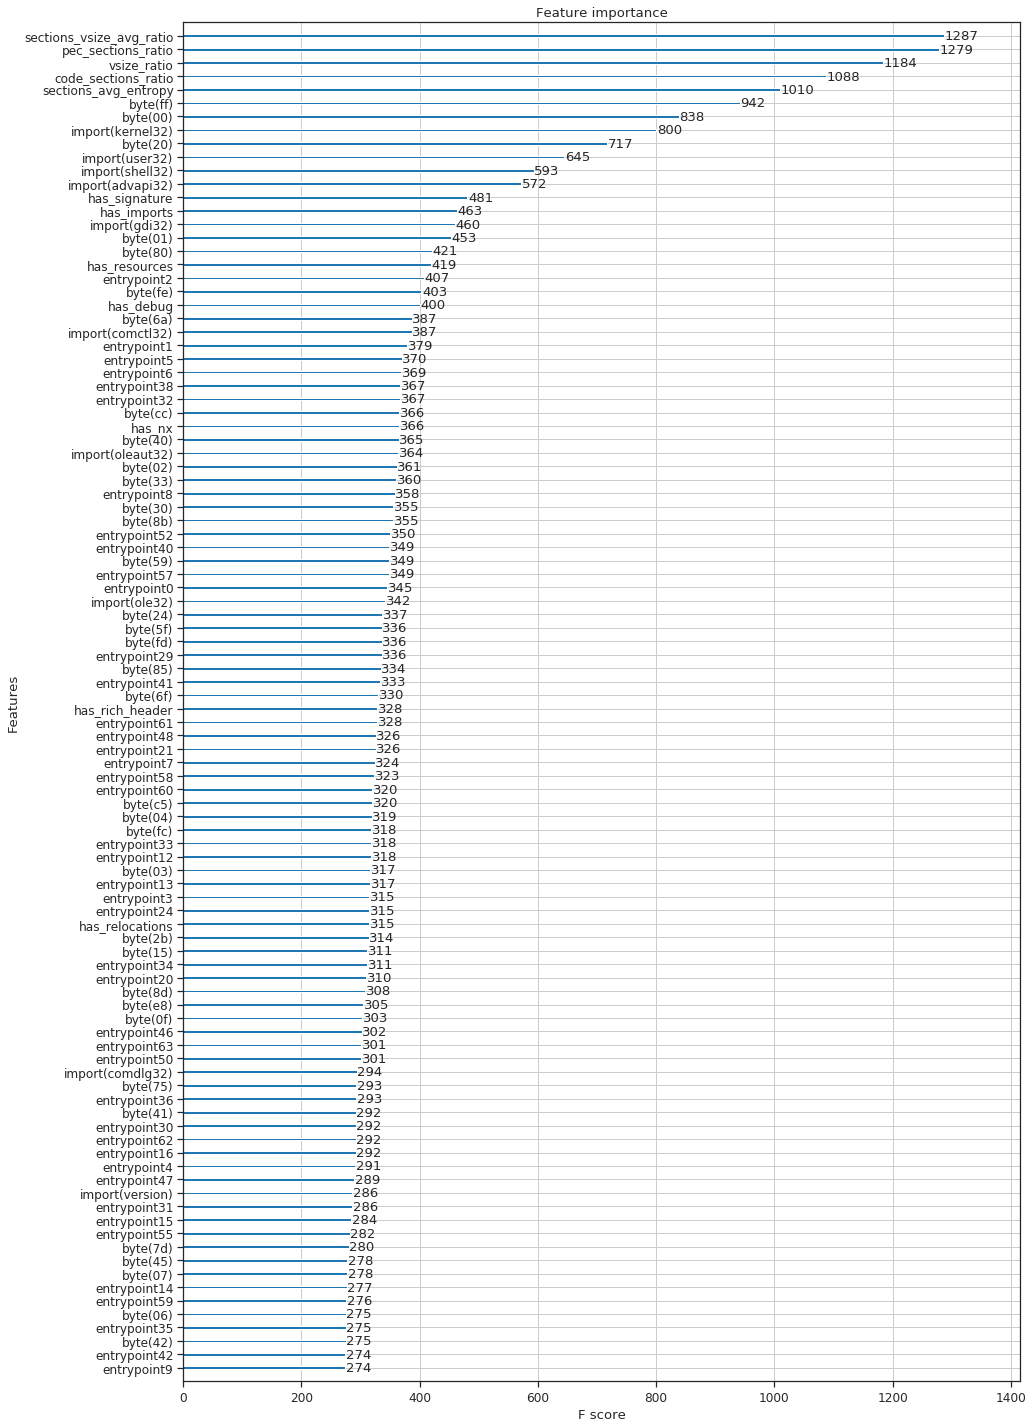

In [23]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15, 25))
plot_importance(model, ax=ax, max_num_features=100)

In [ ]:
# sample = data.sample(frac=1.0)
# y = sample.loc[:,0].values
# X = sample.loc[:,1:].values

# pca = PCA(n_components=10).fit_transform(X)
# X = np.hstack((X, pca))
# X = StandardScaler().fit_transform(X)